Assignment 1 - Exploratory Data Analysis

In this Assigment I am exploring cardiovascular diseases prediction dataset. 
Predictive medicine is a currently in-demand field. By leveraging individual health data, such as body mass index and blood pressure measurements, we can predict the risk of various diseases for an individual. This allows for the early detection of illnesses or the prescription of preventive therapies, ultimately extending life and improving the quality of life for individuals. 
MedTech is the field where I worked for two years and where I aim to continue my career.

At first I import libraries and create data frame from csv-file, which I downloaded from kaggle.com 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

medical_df = pd.read_csv('C:\pythonhomework\diabetes_prediction_dataset.csv')

Now we can look at few strings from data frame

In [3]:
medical_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Now we need to check data format

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


For next computing I change value in the column "gender". I want to replace "Female" to 0 and "Male" to 1. Also I change data types for columns "hypertension, heart_disease, blood_glucose_level, diabetes". And save result to file.

In [5]:
medical_df['gender'] = medical_df['gender'].map({'Male': 0, 'Female': 1})
medical_df['hypertension'] = medical_df['hypertension'].astype(float)
medical_df['heart_disease'] = medical_df['heart_disease'].astype(float)
medical_df['blood_glucose_level'] = medical_df['blood_glucose_level'].astype(float)
medical_df['diabetes'] = medical_df['diabetes'].astype(float)

medical_df.to_csv('C:\pythonhomework\diabetes_prediction_dataset.csv', index=False)



Check changes. Everything is sucsessful.

In [6]:
medical_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,1.0,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,0.0,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,1.0,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,0.0,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


For all strings we need to count new parametr "the probability of developing cardiovascular diseases within 10 years." I found formula in Google. Also I create new column "Probability" with this value.

In [7]:
HR = 0.07

medical_df['Probability'] = 1 - (1 - HR)**(medical_df['gender'] + \
                                           0.1 * medical_df['age'] + medical_df['heart_disease'] + \
                                           medical_df['bmi'] + medical_df['HbA1c_level'] + medical_df['diabetes'])

medical_df.to_csv('C:\pythonhomework\diabetes_prediction_dataset.csv', index=False)

medical_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Probability
0,1.0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,0.951816
1,1.0,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,0.946392
2,0.0,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,0.925688
3,1.0,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,0.909142
4,0.0,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,0.912316


How many people in gifferent age have increase probability

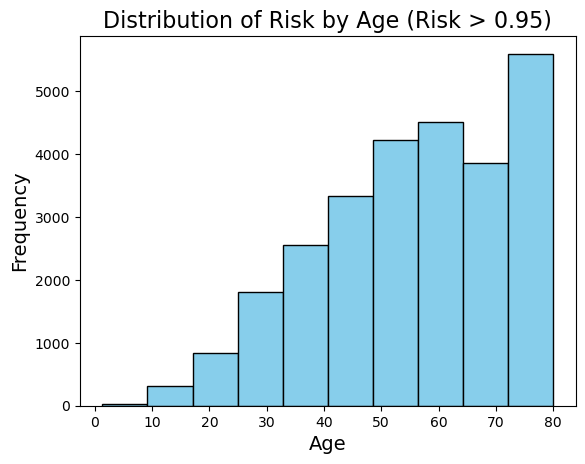

In [8]:

high_risk_df = medical_df[medical_df['Probability'] > 0.95]

plt.hist(high_risk_df['age'], bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of Risk by Age (Risk > 0.95)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

I want to know, how many people in this dataset are smoking, and how big this part of people. I use diagram for it.

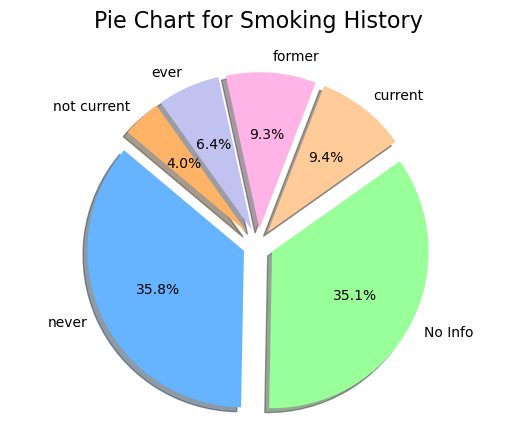

In [11]:

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0', '#ffb366']
explode = [0.1 for category in medical_df['smoking_history'].unique()]

plt.pie(medical_df['smoking_history'].value_counts(), labels=medical_df['smoking_history'].unique(), 
         autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title('Pie Chart for Smoking History', fontsize=16, pad=20)  
plt.axis('equal')  

plt.show()

Also I want to know age distribution using a histogram

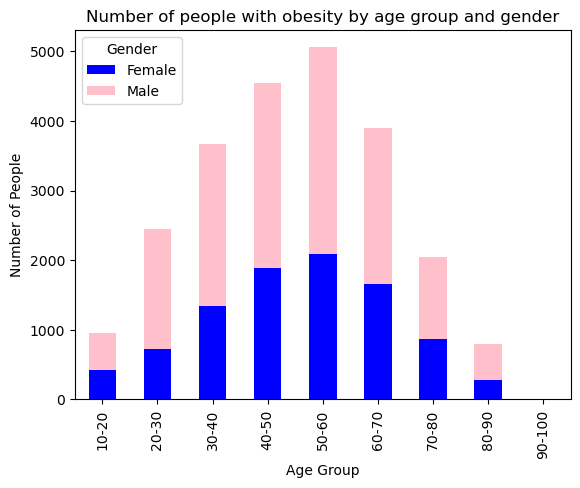

In [12]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
medical_df['Age Group'] = pd.cut(medical_df['age'], bins=bins, labels=labels, right=False)

df_obese = medical_df[medical_df['bmi'] > 30]

grouped_data = df_obese.groupby(['Age Group', 'gender']).size().unstack().fillna(0)

grouped_data.plot(kind='bar', stacked=True, color=['blue', 'pink'])

plt.title('Number of people with obesity by age group and gender')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])
plt.show()


